In [8]:
import pandas as pd
import numpy as np 
import sqlite3
import nltk
#nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import scipy as sp
import sqlite3
import re
from datetime import datetime
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JM\AppData\Roaming\nltk_data...


In [9]:
conn = sqlite3.connect(r"C:\Users\JM\Desktop\storage.db")
df = pd.read_sql_query("SELECT * FROM tweets", conn)
conn.close()

In [10]:
sid = SentimentIntensityAnalyzer()

tw_text_list = df["full_text"].tolist()
polarity_scores = list(map(sid.polarity_scores, tw_text_list))
compound = list(map(lambda x: x["compound"], polarity_scores))

df["compound_pol"] = compound

In [11]:
strip_date = list(map(lambda x: x.split()[0], df["created_at"].to_list()))
df["stripdate"] = strip_date
df_date_group = df[["stripdate", "compound_pol"]].groupby("stripdate", as_index=False).agg(['count','mean']).reset_index()

C:\Users\JM\AppData\Local\Temp\ipykernel_6592\924491563.py:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax1.axhline(y=df_date_group.mean()[1], color="r", linestyle="--", label="Average (All-Time)")


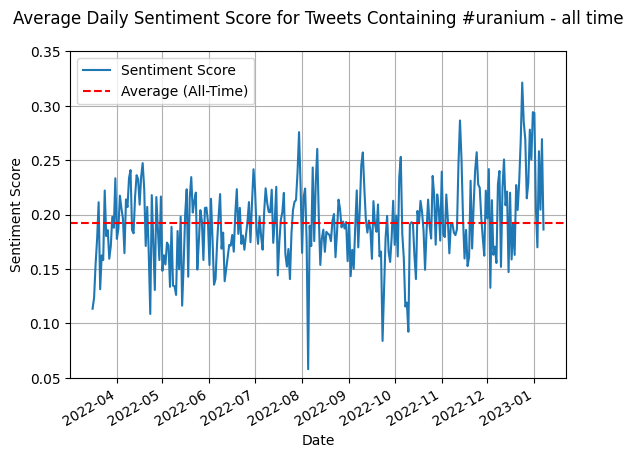

In [42]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(df_date_group["stripdate"].astype('datetime64[ns]'),
         df_date_group["compound_pol"]["mean"],
         label="Sentiment Score")
    
ax1.set_title("Average Daily Sentiment Score for Tweets Containing #uranium - all time",
              pad=20)
ax1.set_ylabel("Sentiment Score")
ax1.set_xlabel("Date")
ax1.set_ylim([0.05,.35])

#date_form = DateFormatter("%M")
#ax1.xaxis.set_major_formatter(date_form)

#datemin = datetime.date(df_date_group["stripdate"].astype('datetime64[ns]').min())
#datemax = datetime.date(df_date_group["stripdate"].astype('datetime64[ns]').max())
#ax1.set_xlim(datemin, datemax)

ax1.format_xdata = mdates.DateFormatter('%M')
ax1.grid(True)
ax1.axhline(y=df_date_group.mean()[1], color="r", linestyle="--", label="Average (All-Time)")
ax1.legend()
fig.autofmt_xdate()

plt.show()

In [13]:
df_date_group[df_date_group['compound_pol']['mean']==df_date_group['compound_pol']['mean'].max()]

stripdate compound_pol          
                       count      mean
283  2022-12-24          110  0.321316

In [17]:
df_last_mon = df_date_group[(df_date_group["stripdate"] > "2022-12-06") & (df_date_group["stripdate"] < "2023-01-06")]

C:\Users\JM\AppData\Local\Temp\ipykernel_6592\2953401299.py:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax1.axhline(y=df_date_group.mean()[1], color="r", linestyle="--", label="Average (All-Time)")


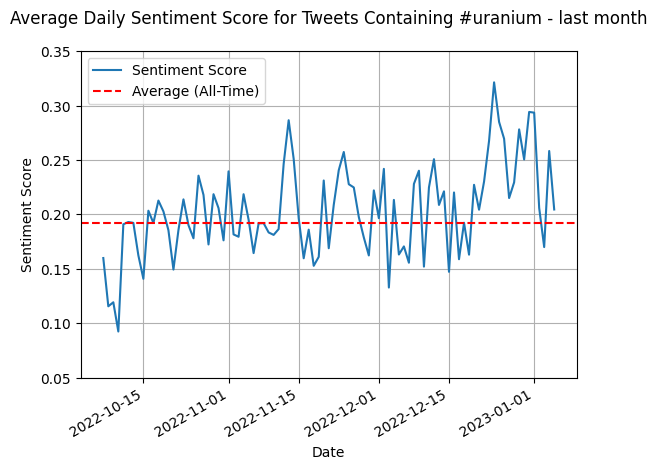

In [41]:
fig, ax1 = plt.subplots()
ln1 = ax1.plot(df_last_mon["stripdate"].astype('datetime64[ns]'),
         df_last_mon["compound_pol"]["mean"],
         label="Sentiment Score")
    
ax1.set_title("Average Daily Sentiment Score for Tweets Containing #uranium - last month",
              pad=20)
ax1.set_ylabel("Sentiment Score")
ax1.set_xlabel("Date")
ax1.set_ylim([0.05,.35])

#date_form = DateFormatter("%M")
#ax1.xaxis.set_major_formatter(date_form)

#datemin = datetime.date(df_date_group["stripdate"].astype('datetime64[ns]').min())
#datemax = datetime.date(df_date_group["stripdate"].astype('datetime64[ns]').max())
#ax1.set_xlim(datemin, datemax)

ax1.format_xdata = mdates.DateFormatter('%M')
ax1.grid(True)
ax1.axhline(y=df_date_group.mean()[1], color="r", linestyle="--", label="Average (All-Time)")
ax1.legend()
fig.autofmt_xdate()

plt.show()

In [16]:
df_date_group

stripdate compound_pol          
                       count      mean
0    2022-03-16          472  0.113467
1    2022-03-17          633  0.123583
2    2022-03-18          493  0.154629
3    2022-03-19          319  0.177824
4    2022-03-20          278  0.211335
..          ...          ...       ...
293  2023-01-03          264  0.169913
294  2023-01-04          234  0.258221
295  2023-01-05          259  0.204450
296  2023-01-06          335  0.269341
297  2023-01-07           39  0.186295

[298 rows x 3 columns]

In [21]:
df_date_group[df_date_group['compound_pol']['mean']==df_date_group['compound_pol']['mean'].min()]

stripdate compound_pol          
                       count      mean
142  2022-08-05          394  0.057878

In [25]:
df_date_group.mean()[1]

C:\Users\JM\AppData\Local\Temp\ipykernel_6592\287664291.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_date_group.mean()[1]


0.1918791500714748